In [48]:
# Listing 3-1
import os
import sys

# Corrected path without concatenating the home directory
os.chdir("C:/Users/ASUS/Desktop/book/ch03")


In [49]:
# Listing 3-3
import urllib.request
import os.path

avURL = "http://datadrivensecurity.info/book/ch03/data/reputation.data"

# Relative path for the downloaded data
avRep = "C:/Users/ASUS/Desktop/book/ch03/reputation.data"

# Using an if-wrapped test with urllib.request.urlretrieve() vs direct read via pandas
# avoids having to re-download a 16MB file every time we run the script
if not os.path.isfile(avRep):
    urllib.request.urlretrieve(avURL, filename=avRep)

In [50]:
# Listing 3-5
import pandas as pd
# read in the data into a pandas data frame
av = pd.read_csv(avRep, sep="#", header=None)

# make smarter column names
av.columns = ["IP","Reliability","Risk","Type","Country",
              "Locale","Coords","x"]
print(av) 

av.head().to_csv(sys.stdout)

                     IP  Reliability  Risk           Type Country  Locale  \
0        222.76.212.189            4     2  Scanning Host      CN  Xiamen   
1        222.76.212.185            4     2  Scanning Host      CN  Xiamen   
2        222.76.212.186            4     2  Scanning Host      CN  Xiamen   
3           5.34.246.67            6     3       Spamming      US     NaN   
4         178.94.97.176            4     5  Scanning Host      UA  Merefa   
...                 ...          ...   ...            ...     ...     ...   
258621  179.244.194.219            4     2       Spamming      BR     NaN   
258622   216.99.159.166            4     2  Scanning Host      US  Walnut   
258623   216.99.159.169            3     2  Scanning Host      US  Walnut   
258624   216.99.159.176            3     2  Scanning Host      US  Walnut   
258625   216.99.159.117            3     3  Scanning Host      US  Walnut   

                              Coords   x  
0         24.4797992706,118.0819

In [18]:
!pip install pandas

     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ------ --------------------------------- 10.2/61.0 kB ? eta -:--:--
     ------------------------- ------------ 41.0/61.0 kB 653.6 kB/s eta 0:00:01
     -------------------------------------- 61.0/61.0 kB 651.3 kB/s eta 0:00:00
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   - -------------------------------------- 0.4/11.6 MB 12.2 MB/s eta 0:00:01
   ----- ---------------------------------- 1.7/11.6 MB 21.9 MB/s eta 0:00:01
   ------------ --------------------------- 3.8/11.6 MB 34.1 MB/s eta 0:00:01
   -------------------- ------------------- 5.9/11.6 MB 37.6 MB/s eta 0:00:01
   ------------------------------- -------- 9.3/11.6 MB 39.5 MB/s eta 0:00:01
   ---------------------------------------  11.6/11.6 MB 50.4 MB/s eta 0:00:01
   ---------------------------------------- 11.6/11.6 MB 40.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
   ----

In [51]:
# Listing 3-6
# require object: av (3-5)
# See corresponding output in Figure 3-1
# import the capability to display Python objects as formatted HTML
from IPython.display import HTML 
# display the first 10 lines of the dataframe as formatted HTML
HTML(av.head(10).to_html())

,IP,Reliability,Risk,Type,Country,Locale,Coords,x
0,222.76.212.189,4,2,Scanning Host,CN,Xiamen,"24.4797992706,118.08190155",11
1,222.76.212.185,4,2,Scanning Host,CN,Xiamen,"24.4797992706,118.08190155",11
2,222.76.212.186,4,2,Scanning Host,CN,Xiamen,"24.4797992706,118.08190155",11
3,5.34.246.67,6,3,Spamming,US,NaN,"38.0,-97.0",12
4,178.94.97.176,4,5,Scanning Host,UA,Merefa,"49.8230018616,36.0507011414",11
5,66.2.49.232,4,2,Scanning Host,US,Union City,"37.5962982178,-122.065696716",11
6,222.76.212.173,4,2,Scanning Host,CN,Xiamen,"24.4797992706,118.08190155",11
7,222.76.212.172,4,2,Scanning Host,CN,Xiamen,"24.4797992706,118.08190155",11
8,222.76.212.171,4,2,Scanning Host,CN,Xiamen,"24.4797992706,118.08190155",11
9,174.142.46.19,6,3,Spamming,NaN,NaN,"24.4797992706,118.08190155",12


In [52]:
# Listing 3-8
# require object: av (3-5)
av['Reliability'].describe()

count    258626.000000
mean          2.798040
std           1.130419
min           1.000000
25%           2.000000
50%           2.000000
75%           4.000000
max          10.000000
Name: Reliability, dtype: float64

In [53]:
av['Risk'].describe()

count    258626.000000
mean          2.221362
std           0.531571
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           7.000000
Name: Risk, dtype: float64

In [54]:
# Listing 3-10
def factor_col(col):
    factor = pd.Categorical(col)
    return pd.Series(factor).value_counts().reindex(factor.categories)

rel_ct = pd.Series(av['Reliability']).value_counts()
risk_ct = pd.Series(av['Risk']).value_counts()
type_ct = pd.Series(av['Type']).value_counts()
country_ct = pd.Series(av['Country']).value_counts()


In [55]:
print(factor_col(av['Reliability']))

1       5612
2     149117
3      10892
4      87040
5          7
6       4758
7        297
8         21
9        686
10       196
Name: count, dtype: int64


In [56]:
print(factor_col(av['Risk']))

1        39
2    213852
3     33719
4      9588
5      1328
6        90
7        10
Name: count, dtype: int64


In [57]:
print(factor_col(av['Type']).head(n=10))

APT;Malware Domain                  1
C&C                               610
C&C;Malware Domain                 31
C&C;Malware IP                     20
C&C;Scanning Host                   7
Malicious Host                   3770
Malicious Host;Malware Domain       4
Malicious Host;Malware IP           2
Malicious Host;Scanning Host      163
Malware Domain                   9274
Name: count, dtype: int64


In [58]:
print(factor_col(av['Country']).head(n=10))

A1     267
A2       2
AE    1827
AL       4
AM       6
AN       3
AO     256
AR    3046
AT      51
AU     155
Name: count, dtype: int64


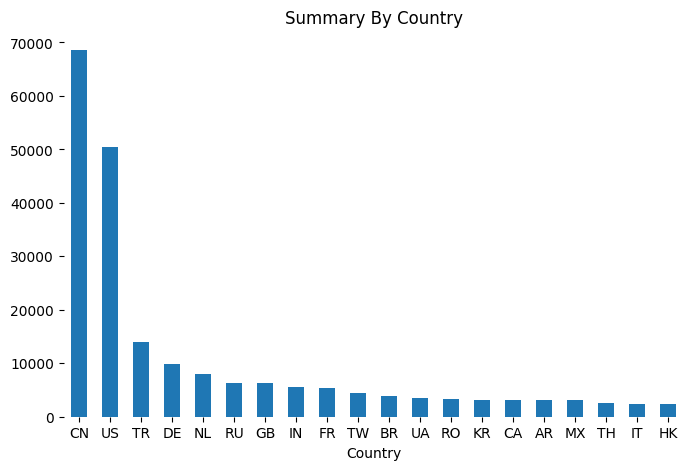

In [59]:
# Listing 3-14
import matplotlib.pyplot as plt

# sort by country
country_ct = pd.Series(av['Country']).value_counts()

# plot the data
plt.axes(frameon=0) # reduce chart junk
country_ct[:20].plot(kind='bar', 
   rot=0, title="Summary By Country", figsize=(8,5)).grid(False)


In [34]:
pip install matplotlib


     ---------------------------------------- 0.0/164.2 kB ? eta -:--:--
     -- ------------------------------------- 10.2/164.2 kB ? eta -:--:--
     -------------------------------------  163.8/164.2 kB 2.0 MB/s eta 0:00:01
     -------------------------------------- 164.2/164.2 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ------ --------------------------------- 1.3/8.0 MB 26.6 MB/s eta 0:00:01
   -------------- ------------------------- 2.8/8.0 MB 29.8 MB/s eta 0:00:01
   ---------------------- ----------------- 4.5/8.0 MB 32.2 MB/s eta 0:00:01
   ---------------------------------- ----- 6.8/8.0 MB 36.0 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 33.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/188.2 kB ? eta -:--:--
   --------------------------------------- 188.2/188.2 kB 11.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------

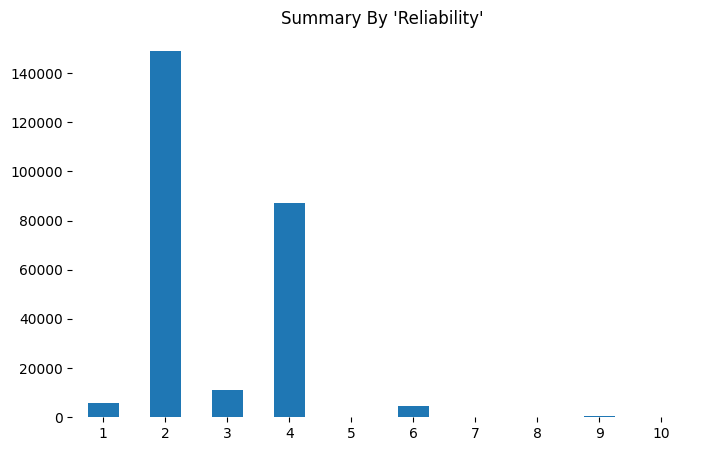

In [60]:
# Listing 3-15
# requires packages: matplotlib
# require object: av (3-5), factor_col (3-10)
# See corresponding output in Figure 3-6
plt.axes(frameon=0) # reduce chart junk
factor_col(av['Reliability']).plot(kind='bar', rot=0,
           title="Summary By 'Reliability'", figsize=(8,5)).grid(False)

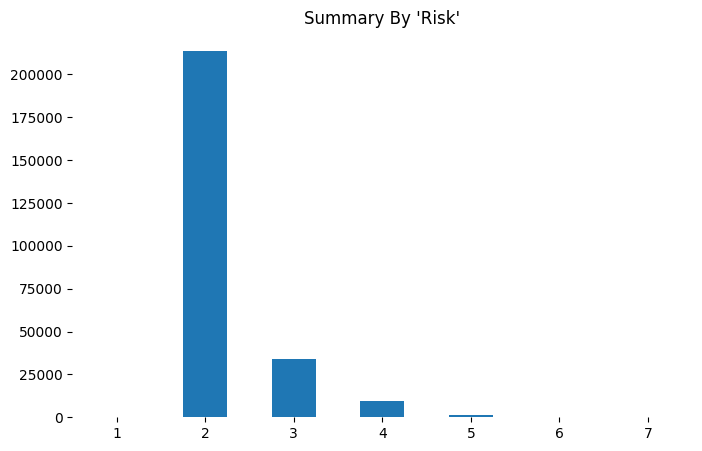

In [61]:
# Listing 3-16
# requires packages: matplotlib
# require object: av (3-5), factor_col (3-10)
# See corresponding output in Figure 3-7
plt.axes(frameon=0) # reduce chart junk
factor_col(av['Risk']).plot(kind='bar', rot=0, 
           title="Summary By 'Risk'", figsize=(8,5)).grid(False)

In [62]:
# Listing 3-18
# require object: av (3-5)
# extract the top 10 most prevalent countries
top10 = pd.Series(av['Country']).value_counts()[0:9]

# calculate the % for each of the top 10
percentage_top10 = top10.astype(float) / len(av['Country'])
print(percentage_top10)


Country
CN    0.265182
US    0.194826
TR    0.053970
DE    0.038484
NL    0.030666
RU    0.024537
GB    0.024332
IN    0.021189
FR    0.021069
Name: count, dtype: float64
